In [3]:
# Installing needed libraries
!pip install catboost

In [6]:
# Imports for the model
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# Saving model import
import joblib
from joblib import load

# Visualization import
import matplotlib.pyplot as plt

In [ ]:
# Set display options to show more rows
pd.set_option('display.max_rows', None)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/CSV Files/Indo-US-P and T data.csv')

# Function to calculate temperature using Ballesteros' formula
def ballesteros_formula(bv):
    if pd.notna(bv):
        return 4600*((1/(0.92*bv+1.7))+(1/(0.92*bv+0.62)))
    else:
        return None

# Apply Ballesteros' formula to the 'BV Index' column and print every calculated temperature
valid_results = []

for bv_value in df['BV Index']:
    temperature = ballesteros_formula(bv_value)
    valid_results.append(temperature)

# Print every calculated temperature
for result in valid_results:
    print(result)


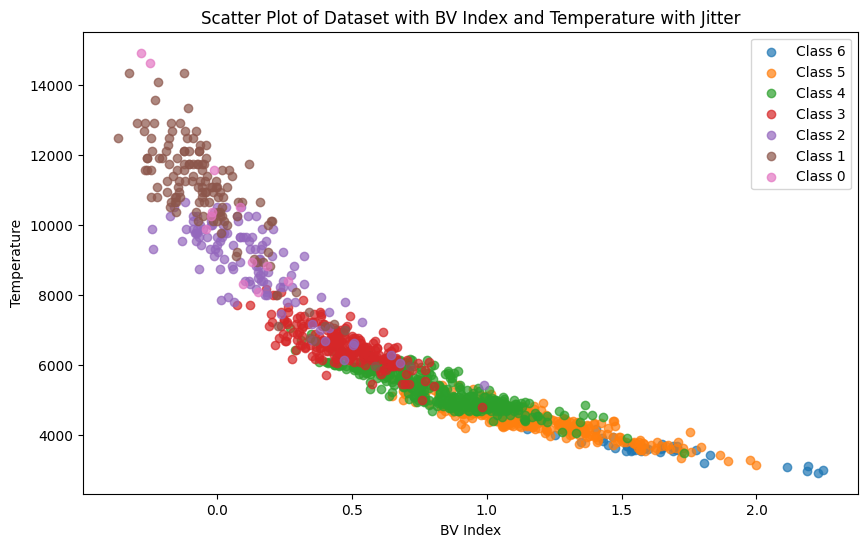

In [23]:
# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/CSV Files/Indo-US-P and T data.csv')

# Assigning features and classes
X = dataset[['BV Index', 'Tempature']]
y = dataset['Class']

plt.figure(figsize=(10, 6))

# Plot each class with a different color
for class_label in y.unique():
    class_data = X[y == class_label]

    # Add jitter to x and y coordinates
    jittered_x = class_data['BV Index'] + np.random.normal(0, 0.1, len(class_data))
    jittered_y = class_data['Tempature'] + np.random.normal(0, 0.1, len(class_data))

    plt.scatter(jittered_x, jittered_y, label=f'Class {class_label}', alpha=0.7)

# Display Graph
plt.title('Scatter Plot of Dataset with BV Index and Temperature with Jitter')
plt.xlabel('BV Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [24]:
# File path for training
file_path = '/content/drive/MyDrive/CSV Files/Indo-US-P and T data.csv'

df = pd.read_csv(file_path)

# Preprocessing steps for training
df = df.dropna()

# Assuming your class label column is named 'Class'
X = df[['BV Index', 'Tempature']]  # Features
y = df['Class']  # Class labels

# Scaling Feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# File path for testing
new_data = pd.read_csv('/content/drive/MyDrive/CSV Files/YSO_2.csv')

# Preprocessing Steps for Testing
new_data = new_data.dropna()


X_new = new_data[['BV Index', 'Tempature']]

# Scaling new features
X_new_scaled = scaler.transform(X_new)
y_new_true = new_data['Class']

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(criterion='gini', n_estimators=150, random_state=0)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the training set
accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
print(f'\nTest Set Accuracy: {accuracy:.2f}')

# Display classification report
print('Test Set Classification Report:')
print(classification_report(y_test, rf_classifier.predict(X_test)))


joblib.dump(rf_classifier, 'rf_model.joblib')



In [ ]:
# Load the trained Random Forest model
loaded_model_rf = load('rf_model.joblib')

y_new_pred = loaded_model_rf.predict(X_new_scaled)
y_new_true = new_data['Class']

#Evaluate the model on the test set
accuracy_new = accuracy_score(y_new_true, y_new_pred)

# Display classification report
print("Accuracy on the new data: {:.2f}".format(accuracy_new))
print('Predictions:')
print(y_new_pred)

Predictions:
[6 6 5 ... 0 0 0]
Accuracy on the new data: 0.75


In [ ]:
from enum import auto
# Hyperparameter tuning with RandomizedSearchCV
param_dist = {'C': [0.1,1,10], 'kernel': ['linear','rbf'], 'gamma': [1,'auto'], 'degree': [2,3]}

# Create the andomizedSearchCV variable
random_search = RandomizedSearchCV(SVC(random_state=42, probability=True), param_distributions=param_dist, n_iter=1, cv=5, random_state=42)

# Use the model on the training set
random_search.fit(X_train, y_train)

# Save the best classifer in variable
best_svm_classifier = random_search.best_estimator_

# Print out best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

# Test on test set on training set
y_pred_best_svm = best_svm_classifier.predict(X_test)

# Evaluate the Best SVM model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
classification_rep_best_svm = classification_report(y_test, y_pred_best_svm)

# Print out classification report
print("Best SVM Model:")
print(f"Accuracy: {accuracy_best_svm:.2f}\n")
print("Classification Report:\n", classification_rep_best_svm)

# Save model
joblib.dump(best_svm_classifier, 'svm_model.joblib')




In [ ]:
# Load the trained model
loaded_model_svm = load('svm_model.joblib')

# Fit model to testing set
y_new_pred = loaded_model_svm.predict(X_new_scaled)
y_new_true = new_data['Class']
accuracy_new = accuracy_score(y_new_true, y_new_pred)

# Print out classification report
print("Accuracy on the new data: {:.2f}".format(accuracy_new))

print('Predictions:')
print(y_new_pred)



In [ ]:
# Load catboost gradient boosting model
catboost_classifier = CatBoostClassifier(iterations=125, depth=4, learning_rate=0.1, loss_function='MultiClass')

# Train the model
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_classifier.predict(X_test)

# Evaluate the CatBoost model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
classification_rep_catboost = classification_report(y_test, y_pred_catboost)

# Print out classifcation report
print("CatBoost Model:")
print(f"Accuracy: {accuracy_catboost:.2f}\n")
print("Classification Report:\n", classification_rep_catboost)

joblib.dump(catboost_classifier, 'catboost_model.joblib')



In [ ]:
# Load the trained model
loaded_model_svm = load('catboost_model.joblib')

# Fit model to testing set
y_new_pred = loaded_model_svm.predict(X_new_scaled)
y_new_true = new_data['Class']
accuracy_new = accuracy_score(y_new_true, y_new_pred)

# Print out classification report
print("Accuracy on the new data: {:.2f}".format(accuracy_new))

print('Predictions:')
print(y_new_pred)

